<a href="https://colab.research.google.com/github/Zebaghaffar/Built-in-Function-in-Python/blob/master/Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os 
from sklearn.model_selection import train_test_split
SEED = 101
SPLIT_RATIO = 0.3 # 70% data will be used to train the AI model while the remaining 30 will be used to valid it.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3,4,5,6,7" 
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint#, CyclicLR
import matplotlib.pyplot as plt
from keras import optimizers

Using TensorFlow backend.


In [3]:
Dataset_CSV = pd.read_csv("./Dataset.csv") 
print(Dataset_CSV.columns)
dataset = Dataset_CSV.values
X = dataset[:,0:2]
y = dataset[:,2]
print(dataset)

Index(['Temperature', 'Humidity', 'EnergyConsumed'], dtype='object')
[[ 30.   17.   57.9]
 [ 17.   12.   36.2]
 [ 91.   10.  138.4]
 [ 96.   15.  148.9]
 [  3.   13.   17.3]
 [ 65.   18.  107.6]
 [ 25.   12.   47.4]
 [  0.   11.   11.7]
 [ 70.   16.  113.2]
 [ 77.   18.  124.4]
 [ 87.   18.  138.4]
 [ 42.   18.   75.4]
 [ 17.   12.   36.2]
 [ 96.   13.  147.5]
 [ 17.   16.   39. ]
 [ 21.   20.   47.4]
 [ 90.   19.  143.3]
 [  5.   14.   20.8]
 [ 52.   11.   84.5]
 [  8.   10.   22.2]
 [  0.   10.   11. ]
 [ 53.   11.   85.9]
 [ 14.   20.   37.6]
 [ 24.   15.   48.1]
 [ 58.   11.   92.9]
 [ 78.   12.  121.6]
 [ 15.   13.   34.1]
 [ 67.   14.  107.6]
 [ 88.   16.  138.4]
 [ 87.   18.  138.4]
 [  6.   16.   23.6]
 [ 39.   11.   66.3]
 [ 99.   18.  155.2]
 [ 76.   15.  120.9]
 [ 75.   13.  118.1]
 [ 23.   11.   43.9]
 [ 15.   13.   34.1]
 [ 84.   19.  134.9]
 [ 83.   11.  127.9]
 [ 93.   18.  146.8]
 [  7.   13.   22.9]
 [ 19.   16.   41.8]
 [ 44.   15.   76.1]
 [ 43.   15.   74.7]
 [ 84. 

# **Preprocessing**

In [4]:

# # create scaler
scaler = StandardScaler()
# fit scaler on data
scaler.fit(X)
# apply transform
X_nn = scaler.transform(X)
print(X_nn)

[[-0.57342244  0.69188571]
 [-1.00134964 -0.89500812]
 [ 1.43454363 -1.52976564]
 [ 1.59913101  0.05712818]
 [-1.46219431 -0.57762935]
 [ 0.57868924  1.00926447]
 [-0.73800983 -0.89500812]
 [-1.56094674 -1.21238688]
 [ 0.74327662  0.37450694]
 [ 0.97369896  1.00926447]
 [ 1.30287372  1.00926447]
 [-0.17841272  1.00926447]
 [-1.00134964 -0.89500812]
 [ 1.59913101 -0.57762935]
 [-1.00134964  0.37450694]
 [-0.86967973  1.644022  ]
 [ 1.40162615  1.32664323]
 [-1.39635936 -0.26025059]
 [ 0.15076204 -1.21238688]
 [-1.29760693 -1.52976564]
 [-1.56094674 -1.52976564]
 [ 0.18367952 -1.21238688]
 [-1.10010207  1.644022  ]
 [-0.7709273   0.05712818]
 [ 0.3482669  -1.21238688]
 [ 1.00661644 -0.89500812]
 [-1.06718459 -0.57762935]
 [ 0.64452419 -0.26025059]
 [ 1.3357912   0.37450694]
 [ 1.30287372  1.00926447]
 [-1.36344188  0.37450694]
 [-0.27716515 -1.21238688]
 [ 1.69788344  1.00926447]
 [ 0.94078148  0.05712818]
 [ 0.90786401 -0.57762935]
 [-0.80384478 -1.21238688]
 [-1.06718459 -0.57762935]
 

# Split dataset into train and test **set**

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X_nn, y, test_size=SPLIT_RATIO, random_state=SEED)
print("Train set examples: {0}".format(len(X_train)))
print("Test set examples: {0}".format(len(X_test)))

Train set examples: 70
Test set examples: 30


# Defining Neural Network

In [6]:
# create model
model = Sequential()
model.add(Dense(128, input_dim=2, kernel_initializer='normal', activation='relu'))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, kernel_initializer='normal'))
adam = optimizers.Adam(learning_rate=0.001)
# Compile model
model.compile(loss='mean_squared_error', optimizer=adam)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 10,753
Trainable params: 10,753
Non-trainable params: 0
__________________________________________________

# Training Loop

In [9]:
checkpointer = ModelCheckpoint(filepath="./Best_PerformingModel.hdf5", verbose=1, 
                           save_best_only=True, monitor="val_loss")
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=50, 
                                                verbose=1, 
                                                factor=0.95,
                                                min_lr=0.000001)
try:
    model.load_weights("./Best_PerformingModel.hdf5")
except Exception as excptn:
    print("Weight file not found")
hist = model.fit(X_train, Y_train, 
                 batch_size=len(X_train), 
                 epochs=1000,          
                 callbacks=[checkpointer, reduce_lr],
                 validation_data=(X_test, Y_test))

Train on 70 samples, validate on 30 samples
Epoch 1/1000
70/70 [==============================] - 0s 94us/step - loss: 151.0881 - val_loss: 2.3650

Epoch 00001: val_loss improved from inf to 2.36503, saving model to ./Best_PerformingModel.hdf5
Epoch 2/1000
70/70 [==============================] - 0s 54us/step - loss: 225.0683 - val_loss: 2.4817

Epoch 00002: val_loss did not improve from 2.36503
Epoch 3/1000
70/70 [==============================] - 0s 53us/step - loss: 301.5302 - val_loss: 2.7945

Epoch 00003: val_loss did not improve from 2.36503
Epoch 4/1000
70/70 [==============================] - 0s 67us/step - loss: 203.9271 - val_loss: 3.1663

Epoch 00004: val_loss did not improve from 2.36503
Epoch 5/1000
70/70 [==============================] - 0s 57us/step - loss: 217.1718 - val_loss: 3.7382

Epoch 00005: val_loss did not improve from 2.36503
Epoch 6/1000
70/70 [==============================] - 0s 48us/step - loss: 312.4657 - val_loss: 4.7578

Epoch 00006: val_loss did not im

# Training Loop : Visualization

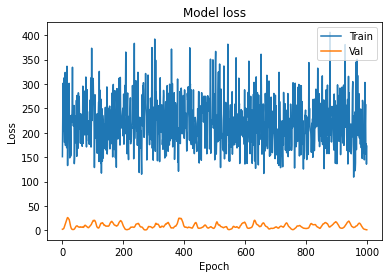

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')

plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Loading best performing model's saved weights

In [11]:
try:
    model.load_weights("./Best_PerformingModel.hdf5")
except Exception as excptn:
    print("Weight file not found")
    
print("Loss on test set: {0}".format(model.evaluate(X_test, Y_test)))

30/30 [==============================] - 0s 40us/step
Loss on test set: 0.9949734807014465


# Perform prediction on test set

In [0]:
evaluation_result = pd.DataFrame(data=[], columns=["EnergyConsumed", "NN_Predicted_EnergyConsumed"])
evaluation_result["EnergyConsumed"] = Y_test
evaluation_result["NN_Predicted_EnergyConsumed"] = model.predict(X_test)

# Values under "EnergyConsumed" are ground truth values
# Values under "NN_Predicted_EnergyConsumed" are NN's predictions.

In [13]:
evaluation_result

,EnergyConsumed,NN_Predicted_EnergyConsumed
0,143.3,143.212784
1,36.2,35.256580
2,74.7,73.332375
3,86.6,86.044449
4,54.4,52.659908
5,85.9,85.007271
6,20.1,20.168482
7,68.4,67.961960
8,47.4,46.054768
9,41.8,40.179359
